In [ ]:
from LevyCurve import LevyCCurve
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

def plot_reg(logs, logN, slope, intercept):
    
    plt.scatter(logs, logN, color='blue', label='Punkty danych')
    
    plt.plot(logs, slope * logs + intercept, color='red', label=f'Regresja: y = {slope:.2f}x + {intercept:.2f}')
    plt.xlabel('log(epsilons)')
    plt.ylabel('log(N)')
    plt.legend()
    plt.title('Regresja liniowa dla wymiaru boxowego')
    plt.show()

def plot_reg(logs, logN, slope, intercept):
    
    plt.scatter(logs, logN, color='blue', label='Punkty danych')
    
    plt.plot(logs, slope * logs + intercept, color='red', label=f'Regresja: y = {slope:.2f}x + {intercept:.2f}')
    plt.xlabel('log(epsilons)')
    plt.ylabel('log(N)')
    plt.legend()
    plt.title('Regresja liniowa dla wymiaru boxowego')
    plt.show()

def compute_box_dimension_v2(points, epsilons):
    points = np.array(points)
    counts = []

    for eps in epsilons:
        grid = np.floor(points / eps)
        counts.append(len(np.unique(grid, axis=0)))

    log_eps_inv = np.log(1/np.array(epsilons))
    log_counts = np.log(counts)

    slope, intercept, _, _, _ = linregress(log_eps_inv, log_counts)
    plot_reg(log_eps_inv, log_counts, slope, intercept)

    return slope

epsilons = []

for i in range(3,11):
    epsilons = epsilons + [1/(2**i)]

epsilons = []

for i in range(3,11):
    epsilons = epsilons + [1/(2**i)]

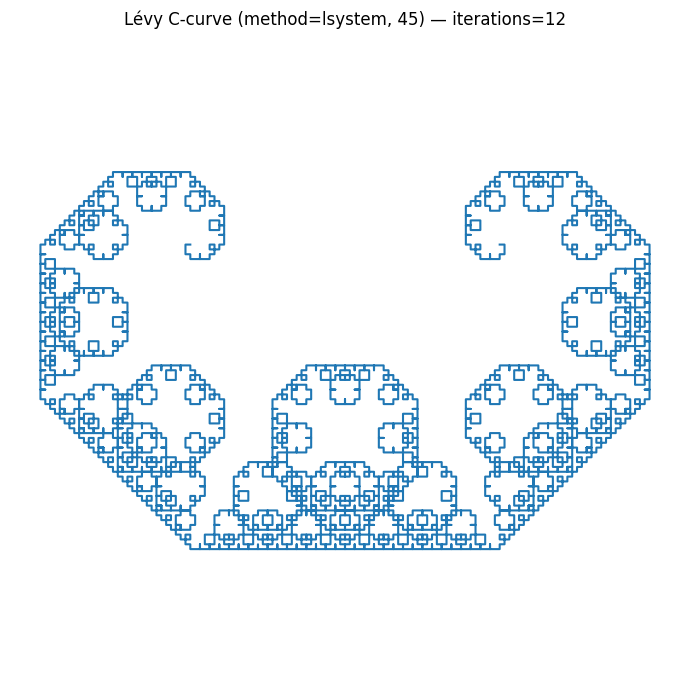

In [24]:
levy = LevyCCurve(iterations=12, angle_deg=45, method="lsystem")

levy.generate()
levy.plot(figsize=(7,7), linewidth=1.5)

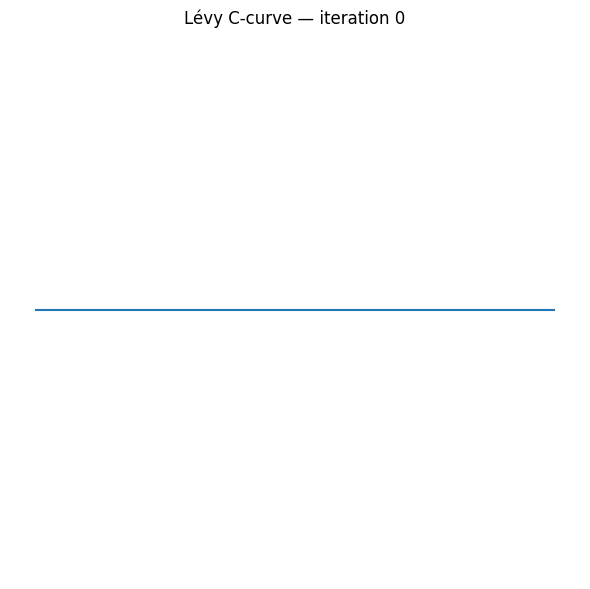

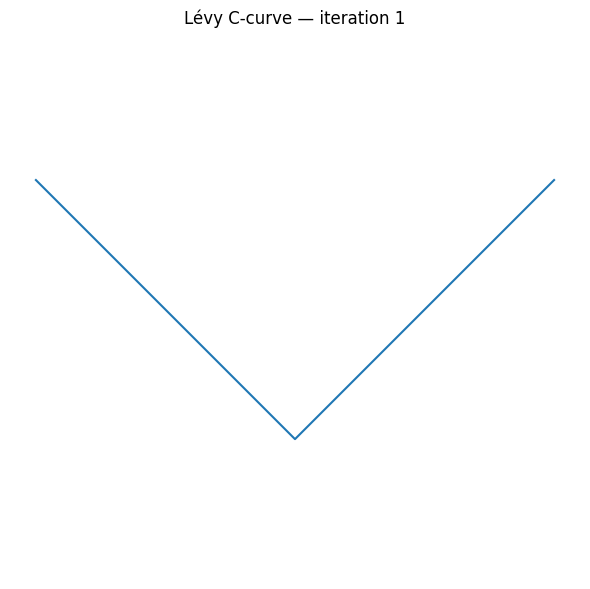

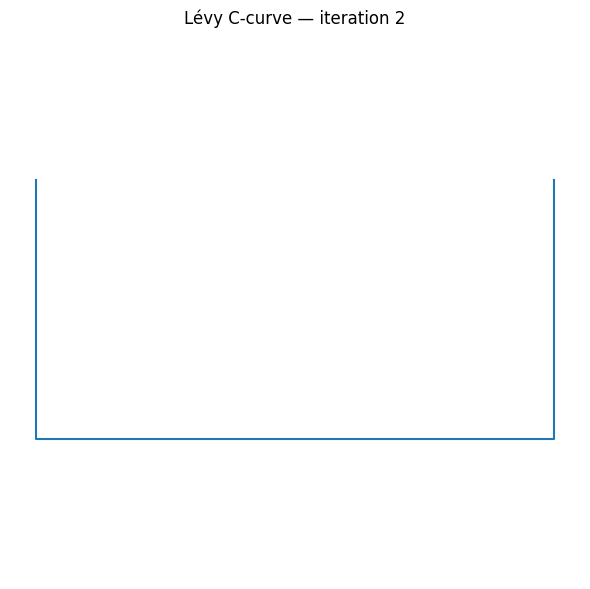

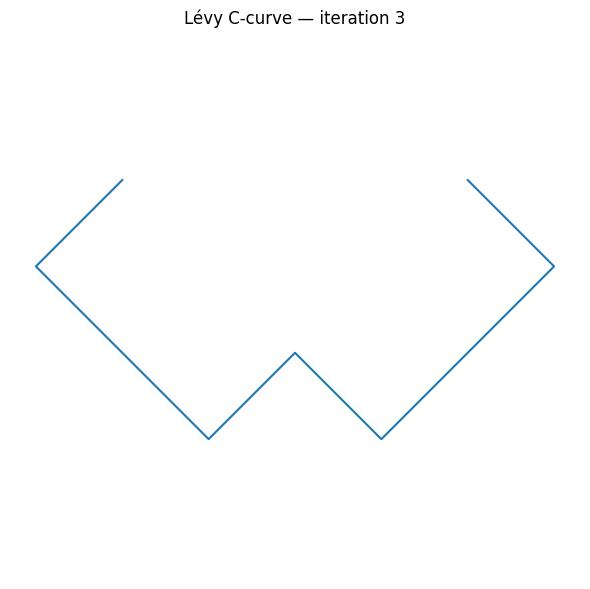

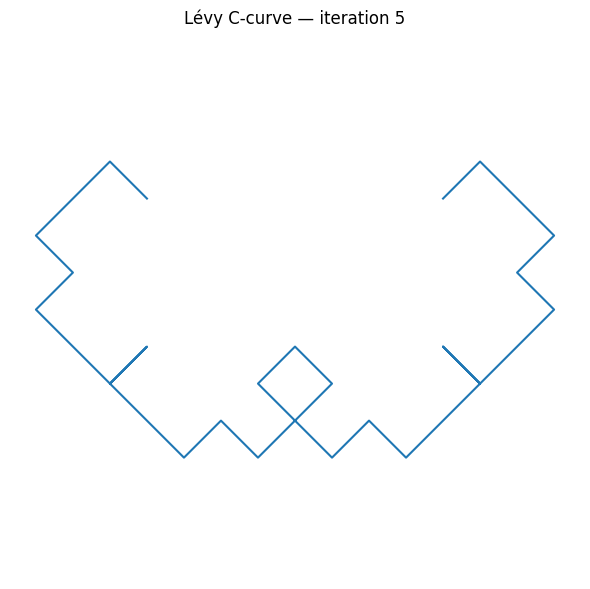

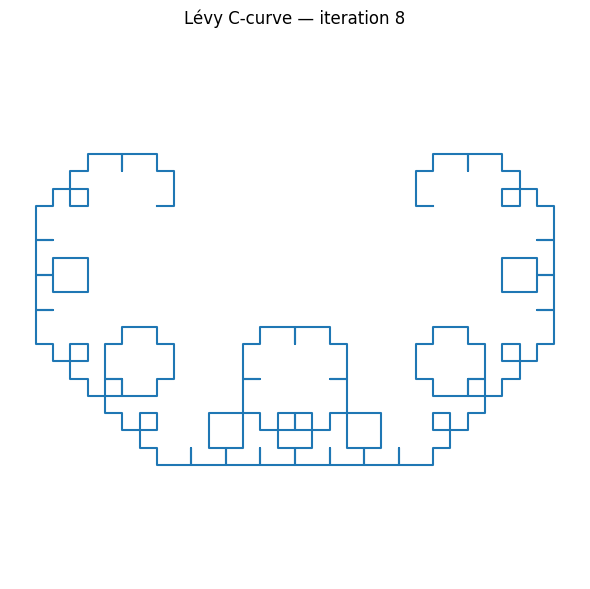

In [25]:
iteration_values = [0, 1, 2, 3, 5, 8]

for i in iteration_values:
    levy = LevyCCurve(iterations=i, method="lsystem")
    levy.generate()
    
    plt.figure(figsize=(6,6))
    xs, ys = zip(*levy.points)
    plt.plot(xs, ys, linewidth=1.5)
    plt.axis('equal')
    plt.axis('off')
    plt.title(f"Lévy C-curve — iteration {i}", pad=12)
    plt.tight_layout()
    plt.show()

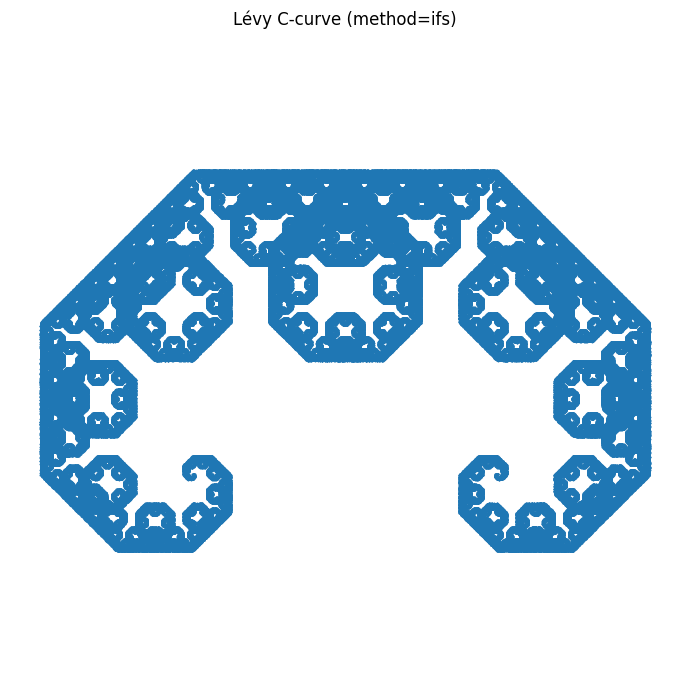

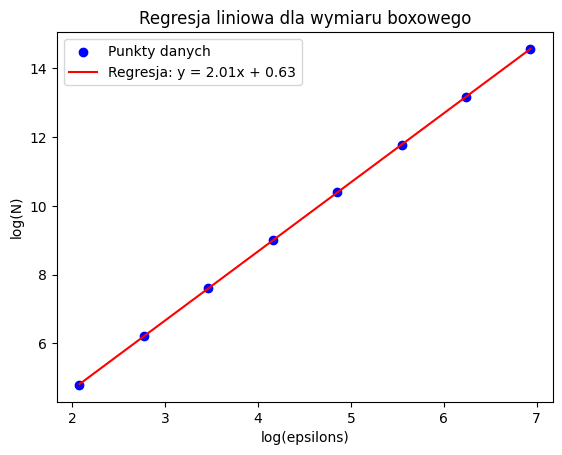

Wymiar boxowy: 2.0109077841220113


In [11]:
n = 1000000
levy = LevyCCurve(method="ifs", n_points=n)

levy.generate()
levy.plot(figsize=(7,7))

T = np.linspace(0, 1, n)
dimension = compute_box_dimension_v2(T, levy.points, epsilons)
print("Wymiar boxowy:", dimension)

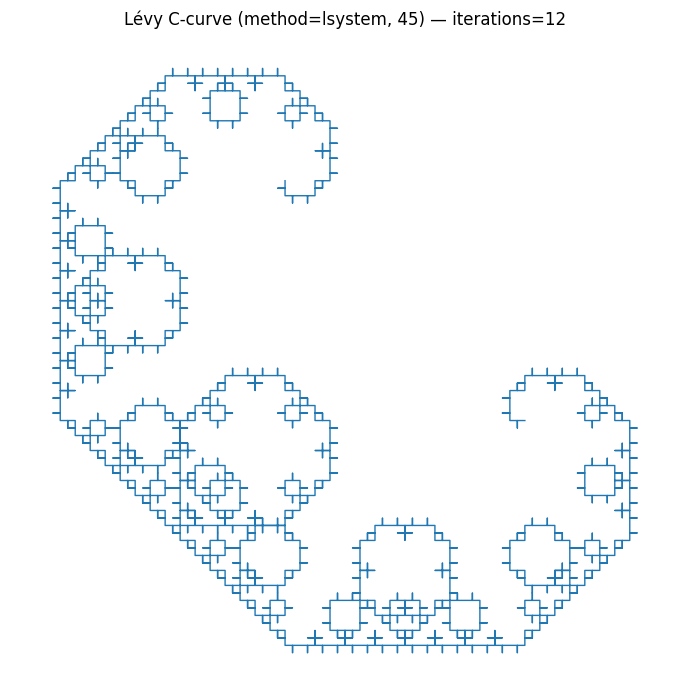

In [36]:
levy = LevyCCurve(iterations=12, angle_deg=45, method="lsystem", lsystem_rules={"F": "-F+--+F-"})

levy.generate()
levy.plot(figsize=(7,7), linewidth=1.0)


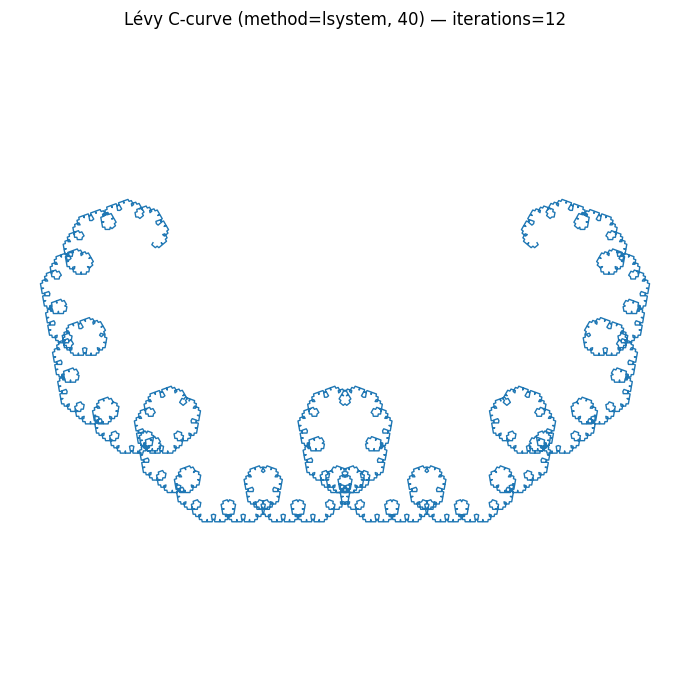

In [61]:
levy = LevyCCurve(iterations=12, angle_deg=40, method="lsystem", lsystem_rules={"F": "+F--F+"})

levy.generate()
levy.plot(figsize=(7,7), linewidth=1.0)


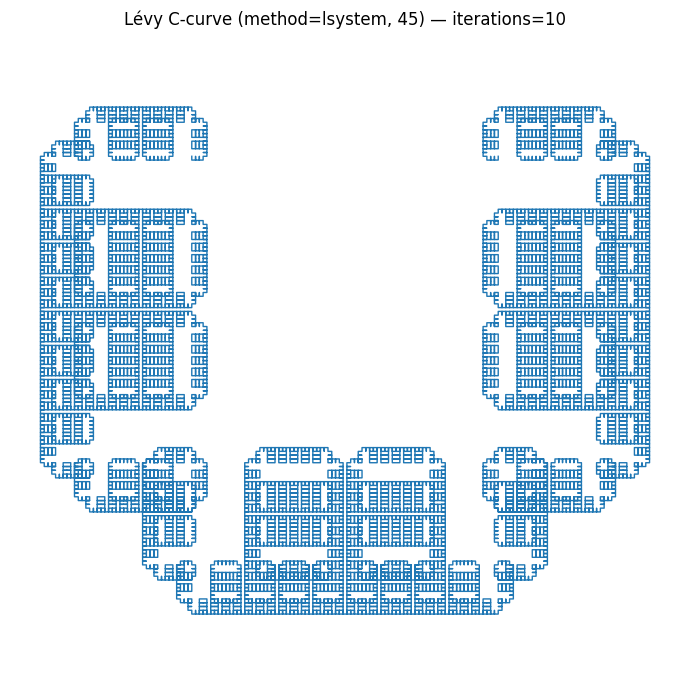

In [40]:
levy = LevyCCurve(iterations=10, angle_deg=45, method="lsystem", lsystem_rules={"F": "+F-+F+-F+"})

levy.generate()
levy.plot(figsize=(7,7), linewidth=1.0)


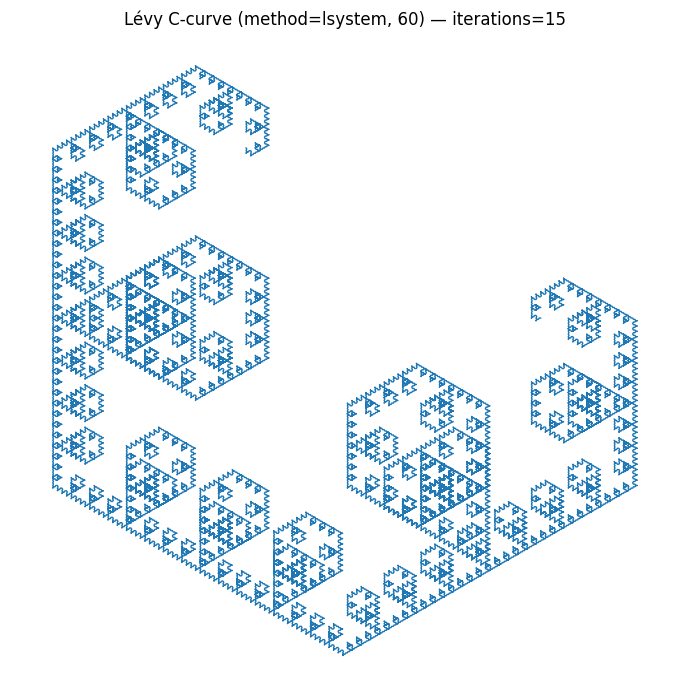

In [69]:
levy = LevyCCurve(iterations=15, angle_deg=60, method="lsystem", lsystem_rules={"F": "+F-+-+-F+"})

levy.generate()
levy.plot(figsize=(7,7), linewidth=1.0)


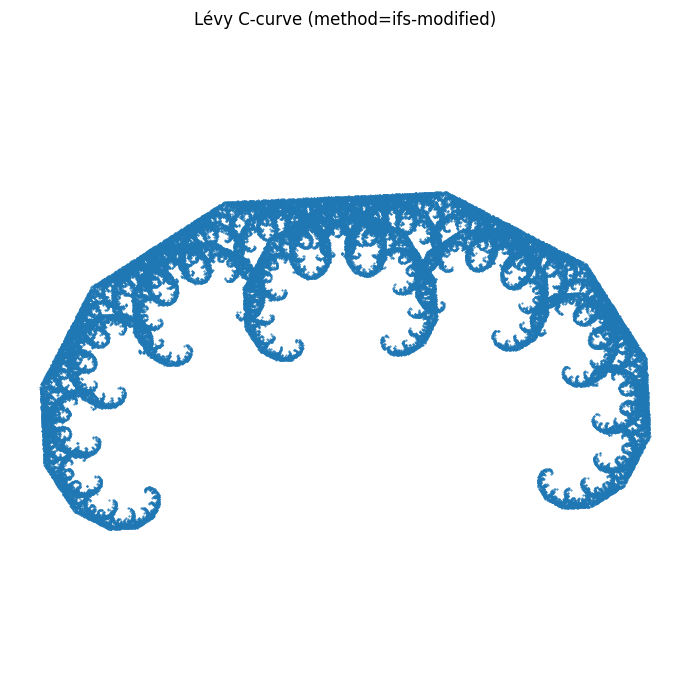

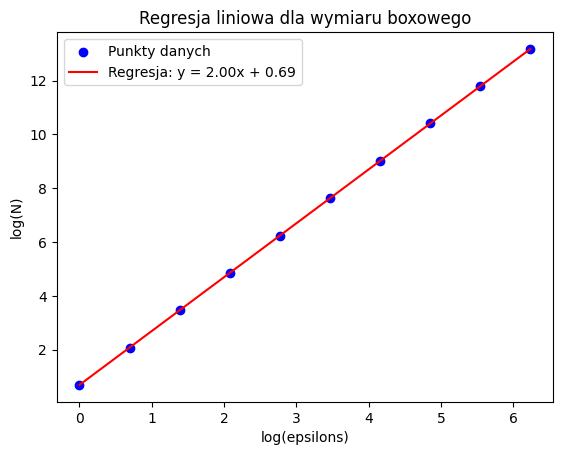

Wymiar boxowy: 2.0011704272863264


In [8]:
n = 100000
levy = LevyCCurve(method="ifs-modified", n_points=n)

levy.generate()
levy.plot(figsize=(7,7))

T = np.linspace(0, 1, n)
dimension = compute_box_dimension_v2(T, levy.points, epsilons)
print("Wymiar boxowy:", dimension)